In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns

mpl.rcParams['figure.figsize'] = [8, 5]
sns.set_style('whitegrid', {'axes.labelcolor': '0', "text.color": '0', 'xtick.color': '0', 'ytick.color': '0', 'font.sans-serif': ['DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],})
sns.set_context('notebook', font_scale=1)

## [HPSC COVID-19 14-day Epidemiology Reports](https://www.hpsc.ie/a-z/respiratory/coronavirus/novelcoronavirus/surveillance/covid-1914-dayepidemiologyreports/)

This notebook uses data copied from the daily [HPSC COVID-19 14-day Epidemiology Reports](https://www.hpsc.ie/a-z/respiratory/coronavirus/novelcoronavirus/surveillance/covid-1914-dayepidemiologyreports/), from 2021-09-29 due to improved data reporting (see the [generated CSV file](https://github.com/derekocallaghan/covid19data/tree/main/notebooks/data/HSPC_COVID_Epidmiology_14Day_Report.csv)). It is currently used to perform some exploratory analysis of age group hospitalisation.

In [3]:
df = pd.read_csv('./data/HSPC_COVID_Epidmiology_14Day_Report.csv', sep=" ", skiprows=13, parse_dates=["Date"], date_parser=lambda x: datetime.strptime(x, "%Y-%m-%d"))
df = df[df.Date>='2021-01-01']#09-29']
df.tail()

,Date,Age Group (years),Number of cases (n),Cases hospitalised (n),Cases hospitalised (%),Cases admitted to ICU (n),Cases admitted to ICU (%)
1902,2021-12-07,55-64,5328,89,16.3,0,0.0
1903,2021-12-07,65-74,2810,79,14.5,0,0.0
1904,2021-12-07,75-84,701,82,15.0,0,0.0
1905,2021-12-07,85+,161,34,6.2,0,0.0
1906,2021-12-07,Unknown,10,0,0.0,0,0.0


### Hospital cases for 0-24, 75+

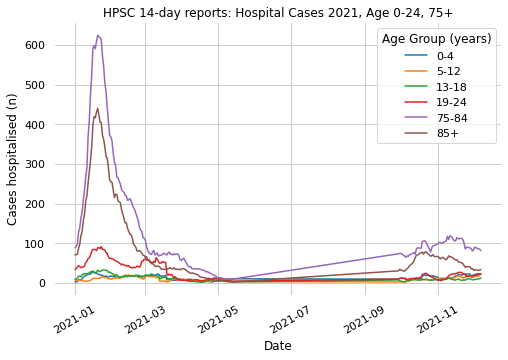

In [4]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18', '19-24', '75-84', '85+']))], x='Date', y='Cases hospitalised (n)', hue='Age Group (years)')
ax.set_title('HPSC 14-day reports: Hospital Cases 2021, Age 0-24, 75+')
sns.despine(left=True, bottom=True)
plt.xticks(rotation=30);
plt.savefig('./figures/hpschospitalcases_0to24_75+.png', bbox_inches="tight")

### Hospital cases for age 0-18, 0-24

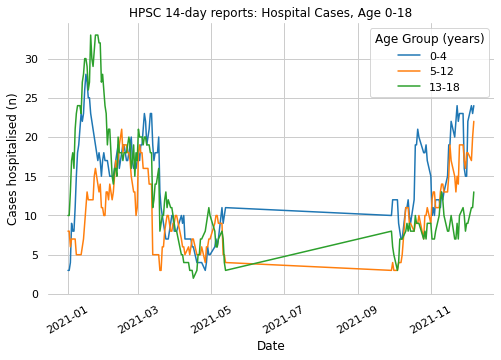

In [5]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18']))], x='Date', y='Cases hospitalised (n)', hue='Age Group (years)')
ax.set_title('HPSC 14-day reports: Hospital Cases, Age 0-18')
ax.set_ylim((-0.1, ax.get_ylim()[1]))
sns.despine(left=True, bottom=True)
plt.xticks(rotation=30);
plt.savefig('./figures/hpschospitalcases_0to18.png', bbox_inches="tight")

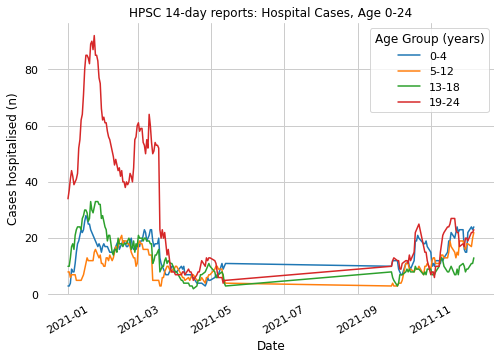

In [6]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18', '19-24']))], x='Date', y='Cases hospitalised (n)', hue='Age Group (years)')
ax.set_title('HPSC 14-day reports: Hospital Cases, Age 0-24')
ax.set_ylim((-0.1, ax.get_ylim()[1]))
sns.despine(left=True, bottom=True)
plt.xticks(rotation=30);
plt.savefig('./figures/hpschospitalcases_0to24.png', bbox_inches="tight")

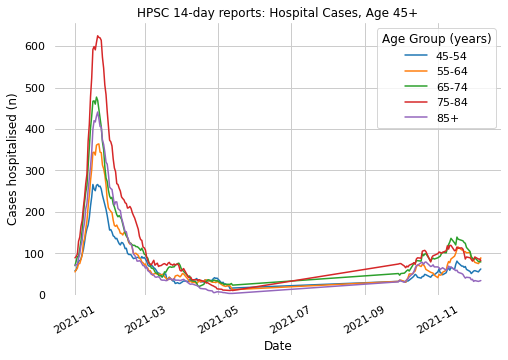

In [7]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['45-54', '55-64', '65-74', '75-84', '85+']))], x='Date', y='Cases hospitalised (n)', hue='Age Group (years)')
ax.set_title('HPSC 14-day reports: Hospital Cases, Age 45+')
ax.set_ylim((-0.1, ax.get_ylim()[1]))
sns.despine(left=True, bottom=True)
plt.xticks(rotation=30);
plt.savefig('./figures/hpschospitalcases_45+.png', bbox_inches="tight")

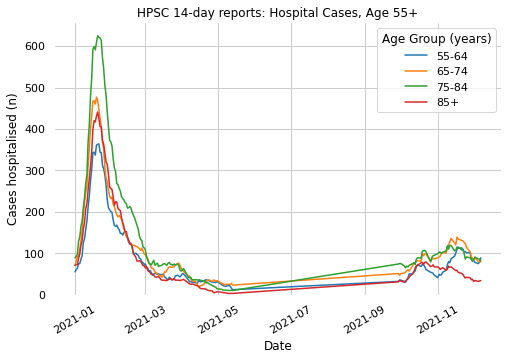

In [8]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['55-64', '65-74', '75-84', '85+']))], x='Date', y='Cases hospitalised (n)', hue='Age Group (years)')
ax.set_title('HPSC 14-day reports: Hospital Cases, Age 55+')
ax.set_ylim((-0.1, ax.get_ylim()[1]))
sns.despine(left=True, bottom=True)
plt.xticks(rotation=30);
plt.savefig('./figures/hpschospitalcases_55+.png', bbox_inches="tight")

### 14-Day total hospital cases for all ages

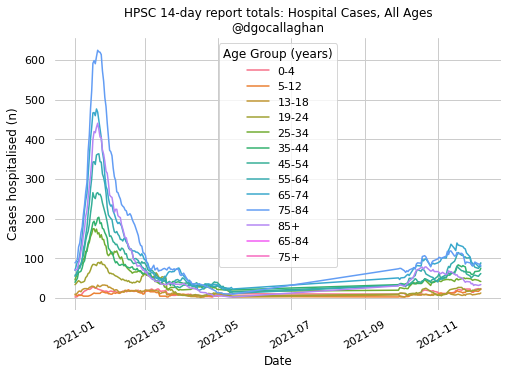

In [9]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (~df["Age Group (years)"].isin(['Unknown']))], x='Date', y='Cases hospitalised (n)', hue='Age Group (years)')
ax.set_title('HPSC 14-day report totals: Hospital Cases, All Ages\n@dgocallaghan')
sns.despine(left=True, bottom=True)
#plt.legend(loc='upper left')
plt.xticks(rotation=30);
plt.savefig('./figures/hpschospitalcases_allages.png', bbox_inches="tight")

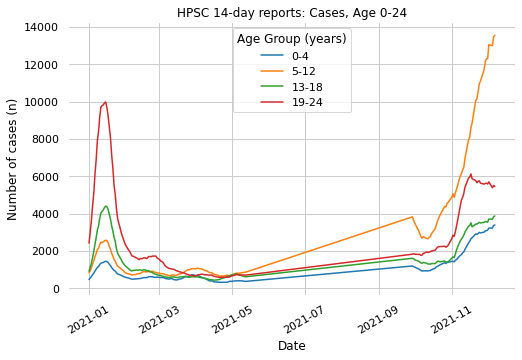

In [10]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18', '19-24']))], x='Date', y='Number of cases (n)', hue='Age Group (years)')
ax.set_title('HPSC 14-day reports: Cases, Age 0-24')
sns.despine(left=True, bottom=True)
plt.xticks(rotation=30);
plt.savefig('./figures/hpsccases_0to24.png', bbox_inches="tight")

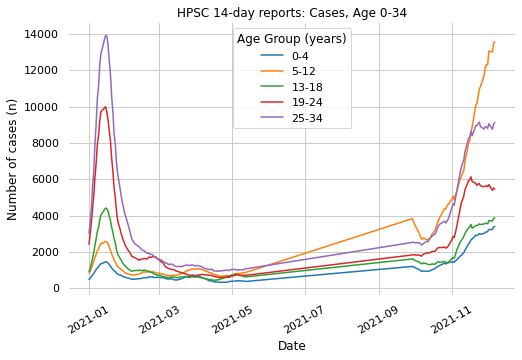

In [11]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18', '19-24', '25-34']))], x='Date', y='Number of cases (n)', hue='Age Group (years)')
ax.set_title('HPSC 14-day reports: Cases, Age 0-34')
sns.despine(left=True, bottom=True)
plt.xticks(rotation=30);
plt.savefig('./figures/hpsccases_0to34.png', bbox_inches="tight")

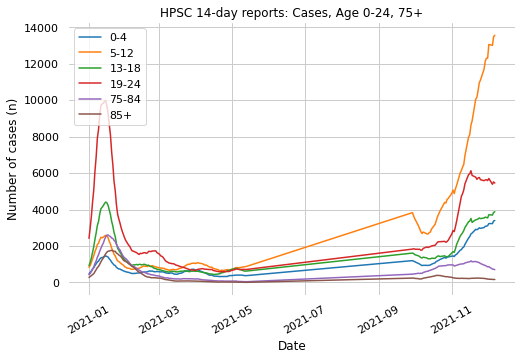

In [12]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18', '19-24', '75-84', '85+']))], x='Date', y='Number of cases (n)', hue='Age Group (years)')
ax.set_title('HPSC 14-day reports: Cases, Age 0-24, 75+')
sns.despine(left=True, bottom=True)
plt.legend(loc='upper left')
plt.xticks(rotation=30);
plt.savefig('./figures/hpsccases_0to24_75+.png', bbox_inches="tight")

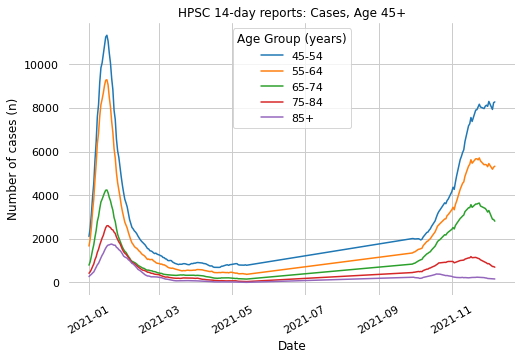

In [13]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['45-54', '55-64', '65-74', '75-84', '85+']))], x='Date', y='Number of cases (n)', hue='Age Group (years)')
ax.set_title('HPSC 14-day reports: Cases, Age 45+')
sns.despine(left=True, bottom=True)
plt.xticks(rotation=30);
plt.savefig('./figures/hpsccases_45+.png', bbox_inches="tight")

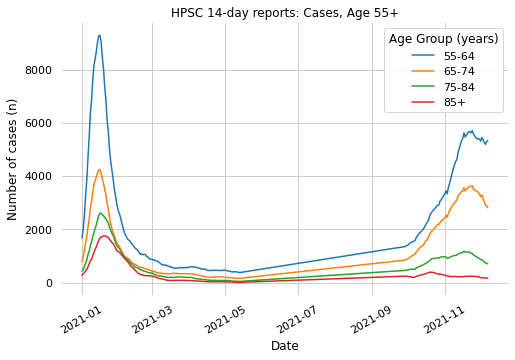

In [14]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['55-64', '65-74', '75-84', '85+']))], x='Date', y='Number of cases (n)', hue='Age Group (years)')
ax.set_title('HPSC 14-day reports: Cases, Age 55+')
sns.despine(left=True, bottom=True)
plt.xticks(rotation=30);
plt.savefig('./figures/hpsccases_55+.png', bbox_inches="tight")

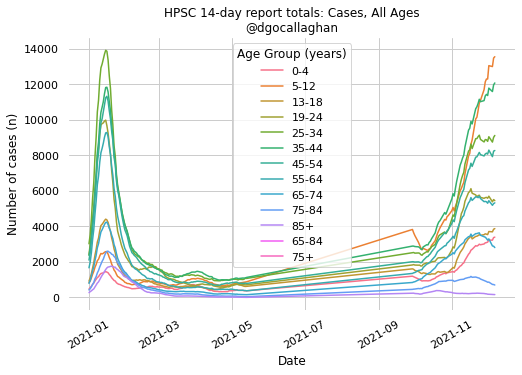

In [15]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (~df["Age Group (years)"].isin(['Unknown']))], x='Date', y='Number of cases (n)', hue='Age Group (years)')
ax.set_title('HPSC 14-day report totals: Cases, All Ages\n@dgocallaghan')
sns.despine(left=True, bottom=True)
#plt.legend(loc='upper left')
plt.xticks(rotation=30);
plt.savefig('./figures/hpsccases_allages.png', bbox_inches="tight")

### The "*Cases hospitalised (%)*" column in the source data is the percentage for a particular age group of the total cases hospitalised. Here, the percentage of the corresponding age group "*Number of cases (n)*" is calculated.

In [16]:
df['AgeGroupHospPerc'] = df['Cases hospitalised (n)']*100/df['Number of cases (n)']
df.head()

,Date,Age Group (years),Number of cases (n),Cases hospitalised (n),Cases hospitalised (%),Cases admitted to ICU (n),Cases admitted to ICU (%),AgeGroupHospPerc
0,2021-01-01,0-4,473,3,0.63,0,0.0,0.634249
1,2021-01-01,5-12,831,8,0.96,0,0.0,0.962696
2,2021-01-01,13-18,920,10,1.09,0,0.0,1.086957
3,2021-01-01,19-24,2422,34,1.40,0,0.0,1.403799
4,2021-01-01,25-34,3023,46,1.52,3,0.1,1.521667


### Daily/fortnightly mean hospitalised/cases percentage for 0-18, 75+

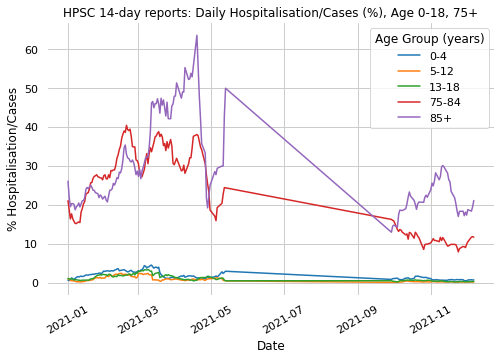

In [17]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18', '75-84', '85+']))], x='Date', y='AgeGroupHospPerc', hue='Age Group (years)')
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('HPSC 14-day reports: Daily Hospitalisation/Cases (%), Age 0-18, 75+')
sns.despine(left=True, bottom=True)
plt.xticks(rotation=30);


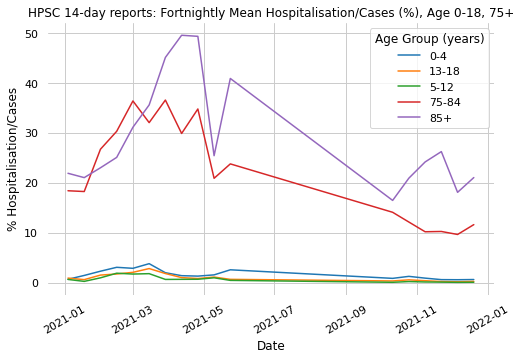

In [18]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18', '75-84', '85+']))].groupby('Age Group (years)').resample('2W-MON', on='Date').mean().reset_index(), x='Date', y='AgeGroupHospPerc', hue='Age Group (years)')
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('HPSC 14-day reports: Fortnightly Mean Hospitalisation/Cases (%), Age 0-18, 75+')
sns.despine(left=True, bottom=True)
plt.xticks(rotation=30);

### Daily/14D/fortnightly mean hospitalised/cases percentage for 0-24

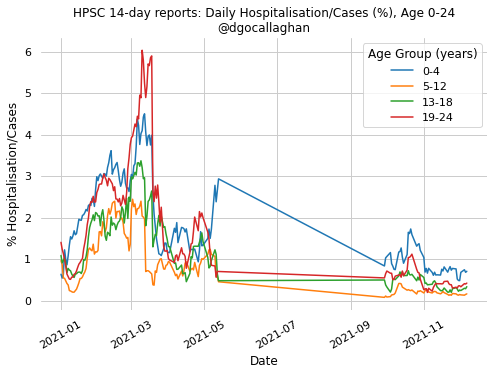

In [19]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18', '19-24']))], x='Date', y='AgeGroupHospPerc', hue='Age Group (years)')
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('HPSC 14-day reports: Daily Hospitalisation/Cases (%), Age 0-24\n@dgocallaghan')
sns.despine(left=True, bottom=True)
plt.xticks(rotation=30);
plt.savefig('./figures/hpscperchospitalcases_0to24.png', bbox_inches="tight")

In [20]:
rdf = df[(df.Date>='2021-01-01')].copy()
rdf.Date = rdf.Date.dt.round('14D')

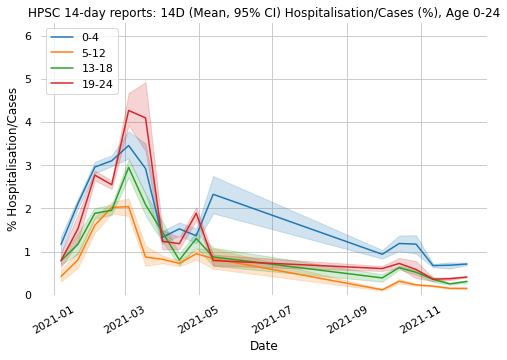

In [21]:
ax=sns.lineplot(data=rdf[(rdf["Age Group (years)"].isin(['0-4', '5-12', '13-18', '19-24']))], x='Date', y='AgeGroupHospPerc', hue='Age Group (years)')
ax.set_ylim((0,6.3))
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('HPSC 14-day reports: 14D (Mean, 95% CI) Hospitalisation/Cases (%), Age 0-24')
sns.despine(left=True, bottom=True)
plt.legend(loc='upper left')
plt.xticks(rotation=30);

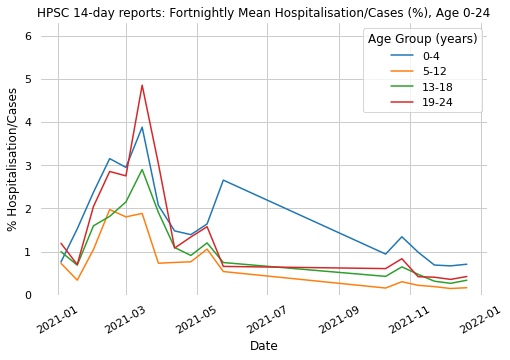

In [22]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18', '19-24']))].groupby('Age Group (years)').resample('2W-MON', on='Date').mean().reset_index(), x='Date', y='AgeGroupHospPerc', hue='Age Group (years)', hue_order=['0-4', '5-12', '13-18', '19-24'])
ax.set_ylim((0,6.3))
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('HPSC 14-day reports: Fortnightly Mean Hospitalisation/Cases (%), Age 0-24')
sns.despine(left=True, bottom=True)
plt.xticks(rotation=30);

### Daily/14D/fortnightly mean hospitalised/cases percentage for all ages

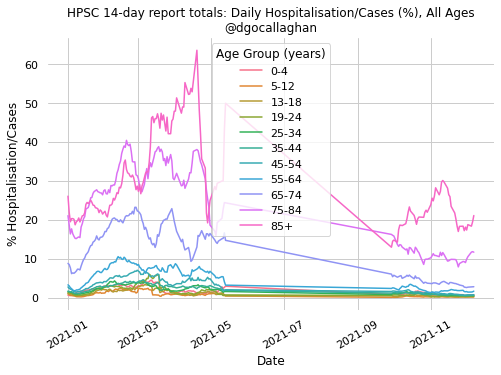

In [23]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (~df["Age Group (years)"].isin(['Unknown']))], x='Date', y='AgeGroupHospPerc', hue='Age Group (years)', hue_order=['0-4', '5-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'])
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('HPSC 14-day report totals: Daily Hospitalisation/Cases (%), All Ages\n@dgocallaghan')
#plt.legend(loc='upper left')
sns.despine(left=True, bottom=True)
plt.xticks(rotation=30);
plt.savefig('./figures/hpscperchospitalcases_allages.png', bbox_inches="tight")

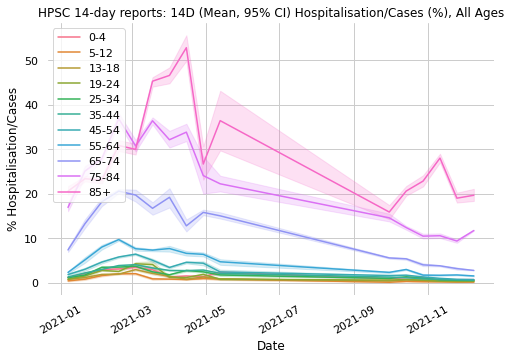

In [24]:
ax=sns.lineplot(data=rdf[(~rdf["Age Group (years)"].isin(['Unknown']))], x='Date', y='AgeGroupHospPerc', hue='Age Group (years)', hue_order=['0-4', '5-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'])
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('HPSC 14-day reports: 14D (Mean, 95% CI) Hospitalisation/Cases (%), All Ages')
plt.legend(loc='upper left')
sns.despine(left=True, bottom=True)
plt.xticks(rotation=30);

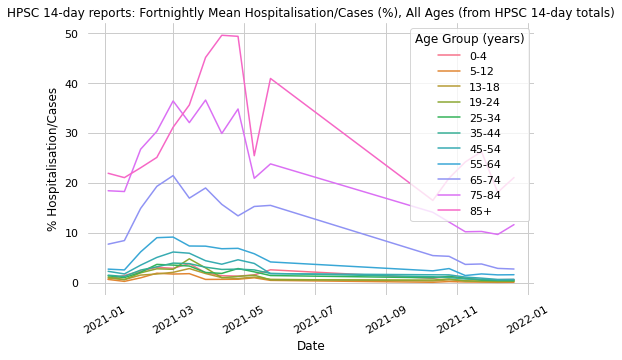

In [25]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (~df["Age Group (years)"].isin(['Unknown']))].groupby('Age Group (years)').resample('2W-MON', on='Date').mean().reset_index(), x='Date', y='AgeGroupHospPerc', hue='Age Group (years)', hue_order=['0-4', '5-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'])
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('HPSC 14-day reports: Fortnightly Mean Hospitalisation/Cases (%), All Ages (from HPSC 14-day totals)')
sns.despine(left=True, bottom=True)
plt.xticks(rotation=30);